<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Decision Trees</a></span><ul class="toc-item"><li><span><a href="#Treinando-Modelo" data-toc-modified-id="Treinando-Modelo-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Treinando Modelo</a></span></li><li><span><a href="#Avaliando-Performance" data-toc-modified-id="Avaliando-Performance-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Avaliando Performance</a></span><ul class="toc-item"><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Accuracy</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Confusion Matrix</a></span></li></ul></li><li><span><a href="#Padronização-dos-Dados" data-toc-modified-id="Padronização-dos-Dados-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Padronização dos Dados</a></span></li><li><span><a href="#Tunando-Hiperparâmetros" data-toc-modified-id="Tunando-Hiperparâmetros-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Tunando Hiperparâmetros</a></span><ul class="toc-item"><li><span><a href="#max_depth" data-toc-modified-id="max_depth-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>max_depth</a></span></li><li><span><a href="#min_samples_split" data-toc-modified-id="min_samples_split-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>min_samples_split</a></span></li><li><span><a href="#min_samples_leaf" data-toc-modified-id="min_samples_leaf-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>min_samples_leaf</a></span></li><li><span><a href="#max_features" data-toc-modified-id="max_features-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>max_features</a></span></li><li><span><a href="#criterion" data-toc-modified-id="criterion-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>criterion</a></span></li><li><span><a href="#GridSearchCV" data-toc-modified-id="GridSearchCV-2.4.6"><span class="toc-item-num">2.4.6&nbsp;&nbsp;</span>GridSearchCV</a></span></li></ul></li><li><span><a href="#Avaliando-Resultados" data-toc-modified-id="Avaliando-Resultados-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Avaliando Resultados</a></span></li></ul></li><li><span><a href="#SGD-Classifier" data-toc-modified-id="SGD-Classifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>SGD Classifier</a></span></li><li><span><a href="#Avaliando-Performance" data-toc-modified-id="Avaliando-Performance-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Avaliando Performance</a></span></li></ul></div>

Este notebook tem por objetivo realizar treinamentos em diferentes algoritmo de Classificação, comparando suas performances e analisando algumas especificidades. Como o tema deste capítulo gira em torno de ```Redes Neurais```, o foco, neste código, será dado ao algoritmo ```MLPClassifier``` do Scikit-Learn.

## MNIST

In [1]:
# Importando biblioteca e lendo arquivo
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [2]:
# Separando features de target
X, y = mnist['data'], mnist['target']

In [3]:
# Entendendo os dados
print(f'O dataset MNIST possui {X.shape[0]} registros e {X.shape[1]} features.')
print(f'O conjunto de target do MNIST possui dimensões: {y.shape}.')

O dataset MNIST possui 70000 registros e 784 features.
O conjunto de target do MNIST possui dimensões: (70000,).


In [4]:
# Visualizando dados
import matplotlib
import matplotlib.pyplot as plt

# Indexando um elemento aleatório
some_digit = X[5000]

# Aplicando reshape para plotar gráfico (imagens são 28x28 pixel)
some_digit_reshaped = some_digit.reshape(28, 28)

# Plotando elemento
plt.imshow(some_digit_reshaped, cmap='binary', interpolation='nearest')
plt.axis('off')
plt.show()

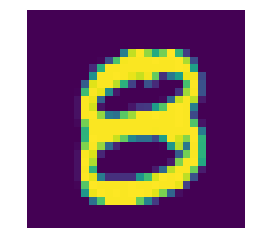

In [5]:
# Plotando outro elemento com formatação diferente
from random import randint

another_digit = X[randint(1, X.shape[0])]
another_digit_reshaped = another_digit.reshape(28, 28)
plt.imshow(another_digit_reshaped, cmap='viridis', interpolation='nearest')
plt.axis('off')
plt.show()

In [6]:
# Separando dados em teste e treino
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

# Verificando separação
print(f'Dados de treino\nX_train: {X_train.shape}\ny_train: {y_train.shape}')
print()
print(f'Dados de teste\nX_test: {X_test.shape}\ny_test: {y_test.shape}')

Dados de treino
X_train: (60000, 784)
y_train: (60000,)

Dados de teste
X_test: (10000, 784)
y_test: (10000,)


In [7]:
# Embaralhando os dados
import numpy as np

shuffle_index = np.random.permutation(X_train.shape[0])
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [8]:
# Criando função para realizar todo o procedimento
def prepare_mnist():
    """
    Função responsável por importar e realizar todos os procedimentos preparatórios
    no dataset MNIST.
    
    Output: X_train, y_train, X_test, y_test
    """
    
    # Download das bibliotecas necessárias
    from sklearn.datasets import fetch_mldata
    import numpy as np
    
    # Download e separação do dataset
    mnist = fetch_mldata('MNIST original')
    X, y = mnist['data'], mnist['target']
    
    # Separando dados de treino e de teste
    X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]
    
    # Embaralhando dados
    shuffle_index = np.random.permutation(X_train.shape[0])
    X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
    
    # Retornando dados
    return X_train, y_train, X_test, y_test

In [13]:
# Chamando função e verificando viabilidade
X_train, y_train, X_test, y_test = prepare_mnist()
print(f'Dados de treino\nX_train: {X_train.shape}\ny_train: {y_train.shape}')
print()
print(f'Dados de teste\nX_test: {X_test.shape}\ny_test: {y_test.shape}')

Dados de treino
X_train: (60000, 784)
y_train: (60000,)

Dados de teste
X_test: (10000, 784)
y_test: (10000,)


## Decision Trees

O primeiro algoritmo utilizado será o ```DecisionTrees```: [Doc](https://scikit-learn.org/stable/modules/tree.html)

In [14]:
# Lendo e preparando dados do MNIST
X_train, y_train, X_test, y_test = prepare_mnist()

### Treinando Modelo

In [15]:
# Importando biblioteca
from sklearn.tree import DecisionTreeClassifier

# Criando classificador
tree_clf = DecisionTreeClassifier()

# Treinando modelo
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Avaliando Performance

#### Accuracy

In [16]:
# Avaliando acurácia com os dados de treino
from sklearn.metrics import accuracy_score

tree_pred_train = tree_clf.predict(X_train)
tree_accuracy_train = accuracy_score(y_train, tree_pred_train)
print(f'Acurácia do modelo Decision Trees: {tree_accuracy_train*100:.2f}%')

Acurácia do modelo Decision Trees: 100.00%


Será um tremendo overfitting? Avaliando performance utilizando validação cruzada.

In [17]:
# Aplicando cross validation
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3, scoring='accuracy')
print(f'Scores: {tree_scores}')
print(f'Média: {tree_scores.mean():.4f}')
print(f'Desvio Padrão: {tree_scores.std():.4f}')

Scores: [0.86377724 0.85989299 0.86022903]
Média: 0.8613
Desvio Padrão: 0.0018


A diferença dos resultados obtidos com o ```cross validation``` indica que há um pequeno ```overfitting``` nos dados.

In [19]:
# Criando função para mostrar scores da validação cruzado
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Média: {scores.mean():.4f}')
    print(f'Desvio Padrão: {scores.std():.4f}')

#### Confusion Matrix

In [20]:
# Importando matriz de confusão
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

tree_cross_pred = cross_val_predict(tree_clf, X_train, y_train, cv=3)

conf_mx = confusion_matrix(y_train, tree_cross_pred)

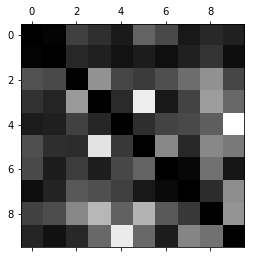

In [21]:
# Visualizando matriz de confusão
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

### Padronização dos Dados

In [22]:
# Aplicando padronização dos dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Realizando novo treinamento
tree_scores_scaled = cross_val_score(tree_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')
display_scores(tree_scores_scaled)

Scores: [0.86232753 0.86179309 0.8640296 ]
Média: 0.8627
Desvio Padrão: 0.0010


In [30]:
# Calculando diferença na acurácia
tree_diff = tree_scores_scaled - tree_scores
display_scores(tree_diff)

# Comunicando diferença na média
mean_scaled = tree_scores_scaled.mean()
mean_normal = tree_scores.mean()
mean_diff = mean_scaled - mean_normal
print(f'\nGanho (ou perda) de acurácia com a padronização: {mean_diff*100:.4f}%')

Scores: [-0.00144971  0.0019001   0.00380057]
Média: 0.0014
Desvio Padrão: 0.0022

Ganho (ou perda) de acurácia com a padronização: 0.1417%


Não houve melhora significativa (se é que houve melhora). Dessa forma, é possível concluir que a Padronização dos dados não surtiu efeito dentro do algorítmo ```DecisionTrees```.

### Tunando Hiperparâmetros

Os efeitos de cada um dos hiperparâmetros presentes no ```DecisionTreeClassifier()``` ainda são desconhecidos. Esta sessão (e também as próximas) possui o objetivo de avaliar os efeitos dos hiperparâmetros na acurácia medida, tanto com os dados de treino, como com os dados de teste. Fonte de inspiração: [InDepth-DecisionTreeHyperparameters](https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3)

Antes de mais nada, vamos aplicar o ```GridSearchCV``` para verificar qual a melhor combinação.

In [31]:
# Aplicando GridSearchCV
from sklearn.model_selection import GridSearchCV

# Definindo parâmetros para Decision Trees
param_grid_tree = [
    {'criterion': ['gini', 'entropy'],
     'max_depth': [5, 10, 15]}
]

# Criando classificador
tree_clf = DecisionTreeClassifier()

# Treinando e procurando a melhor combinação
grid_search = GridSearchCV(tree_clf, param_grid_tree, cv=3, 
                           scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [17]:
# Verificando melhores parâmetros
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 15}

In [32]:
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f'Score: {mean_score*100:.4f} - Params: {params}')

Score: 66.6067 - Params: {'criterion': 'gini', 'max_depth': 5}
Score: 84.8900 - Params: {'criterion': 'gini', 'max_depth': 10}
Score: 86.4917 - Params: {'criterion': 'gini', 'max_depth': 15}
Score: 68.7683 - Params: {'criterion': 'entropy', 'max_depth': 5}
Score: 86.2533 - Params: {'criterion': 'entropy', 'max_depth': 10}
Score: 87.1067 - Params: {'criterion': 'entropy', 'max_depth': 15}


In [37]:
# Comunicando melhora
print(f'Acurácia inicial: {tree_scores.mean()*100:.4f}%')
print(f'Acurácia com padronização: {tree_scores_scaled.mean()*100:.4f}%')
print(f'Acurácia com Grid Search CV(1): {grid_search.best_score_*100:.4f}%')

print(f'\nGanho total até o momento: {(grid_search.best_score_ - tree_scores.mean())*100:.4f}%')

Acurácia inicial: 86.1300%
Acurácia com padronização: 86.2717%
Acurácia com Grid Search CV(1): 87.1067%

Ganho total até o momento: 0.9767%


Aparentemente, é possível melhorar através do aumento do hiperparâmetro ```max_depth```.

In [39]:
# Definindo parâmetros para Decision Trees
param_grid_tree = [
    {'criterion': ['gini', 'entropy'],
     'max_depth': [15, 50, 55, 60, 65, 70]}
]

# Criando classificador
tree_clf = DecisionTreeClassifier()

# Treinando e procurando a melhor combinação
grid_search = GridSearchCV(tree_clf, param_grid_tree, cv=3, 
                           scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': [15, 50, 55, 60, 65, 70]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [40]:
# Verificando melhores parâmetros
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 15}

In [41]:
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f'Score: {mean_score*100:.4f} - Params: {params}')

Score: 86.6517 - Params: {'criterion': 'gini', 'max_depth': 15}
Score: 86.1333 - Params: {'criterion': 'gini', 'max_depth': 50}
Score: 86.1983 - Params: {'criterion': 'gini', 'max_depth': 55}
Score: 86.1833 - Params: {'criterion': 'gini', 'max_depth': 60}
Score: 86.0817 - Params: {'criterion': 'gini', 'max_depth': 65}
Score: 86.0433 - Params: {'criterion': 'gini', 'max_depth': 70}
Score: 87.3100 - Params: {'criterion': 'entropy', 'max_depth': 15}
Score: 87.2600 - Params: {'criterion': 'entropy', 'max_depth': 50}
Score: 87.0417 - Params: {'criterion': 'entropy', 'max_depth': 55}
Score: 87.1417 - Params: {'criterion': 'entropy', 'max_depth': 60}
Score: 87.1733 - Params: {'criterion': 'entropy', 'max_depth': 65}
Score: 87.2167 - Params: {'criterion': 'entropy', 'max_depth': 70}


O ganho obtido com o aumento do hiperparâmetro ```max_depth``` foi irrisório.

#### max_depth

O hiperparâmetro ```max_depth``` indica o quão profunda a árvore de decisão pode ser.

In [50]:
# Avaliando a melhor forma de distribuir os valores
np.linspace(1, 32)

array([ 1.        ,  1.63265306,  2.26530612,  2.89795918,  3.53061224,
        4.16326531,  4.79591837,  5.42857143,  6.06122449,  6.69387755,
        7.32653061,  7.95918367,  8.59183673,  9.2244898 ,  9.85714286,
       10.48979592, 11.12244898, 11.75510204, 12.3877551 , 13.02040816,
       13.65306122, 14.28571429, 14.91836735, 15.55102041, 16.18367347,
       16.81632653, 17.44897959, 18.08163265, 18.71428571, 19.34693878,
       19.97959184, 20.6122449 , 21.24489796, 21.87755102, 22.51020408,
       23.14285714, 23.7755102 , 24.40816327, 25.04081633, 25.67346939,
       26.30612245, 26.93877551, 27.57142857, 28.20408163, 28.83673469,
       29.46938776, 30.10204082, 30.73469388, 31.36734694, 32.        ])

In [55]:
# Melhorando distribuição
np.linspace(1, 32, 32, endpoint=True)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.])

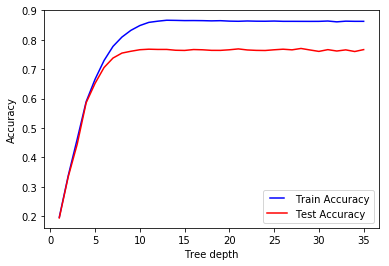

In [60]:
# Configurando avaliação
max_depths = np.linspace(1, 35, 35, endpoint=True)
train_results = []
test_results = []

for depth in max_depths:
    # Treinando classificador com hiperparâmetro estabelecido
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train, y_train) # Sem utilizar X_train_scaled
    
    # Realizando predições com dados de treino
    tree_train_scores = cross_val_score(tree_clf, X_train, y_train, 
                                        cv=3, scoring='accuracy')
    train_results.append(tree_train_scores.mean())
    
    # Realizando predições com os dados de teste
    tree_test_scores = cross_val_score(tree_clf, X_test, y_test,
                                      cv=3, scoring='accuracy')
    test_results.append(tree_test_scores.mean())
    
# Plotando gráfico
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

Após a análise realizada acima, é possível concluir a existência da proporcionalidade entre o aumento do parâmetro ```max_depth``` com o efeito de ```overfitting``` no treinamento, uma vez que a diferença entre as acurácias obtidas com os dados de treino e teste apresentam uma significativa diferença a partir de uma profundidade de 5.

Observando o gráfico, é possível supor o nível 10 de profundidade como sendo ótimo.

In [82]:
# Calculando melhor profundidade para os dados de teste
train_depth_results = train_results
test_depth_results = test_results

max_acc_test = test_depth_results.index(max(test_depth_results))+1
print(f'Acurácia máxima nos dados de teste: max_depth={max_acc_test}')
print(f'Acurácia nos dados de treino com esse parâmetro: {train_depth_results[max_acc_test-1]:.4f}')

Acurácia máxima nos dados de teste: max_depth=28
Acurácia nos dados de treino com esse parâmetro: 0.8628


#### min_samples_split

O hiperparâmetro ```min_samples_split``` representa o número mínimo de amostras necessárias para 'splitar' um nó interno da árvore. Ao aumentar este hiperparâmetro, a árvore se torna mais restrira, uma vez que é necessário considerar um número maior de amostras para separar os nós. No teste a seguir, iremos avaliar os resultados entre 10% e 100% de amostras.

In [84]:
# Avaliando melhor distribuição
np.linspace(0.1, 1.0, 10, endpoint=True)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

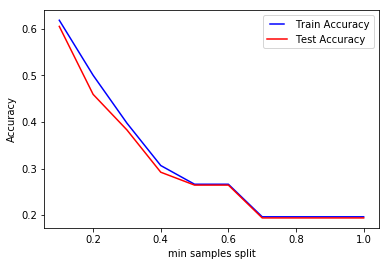

In [89]:
# Configurando avaliação
min_samples_split = np.linspace(.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []

for min_sample in min_samples_split:
    tree_clf = DecisionTreeClassifier(min_samples_split=min_sample)
    tree_clf.fit(X_train, y_train)
    
    # Dados de treino
    tree_train_scores = cross_val_score(tree_clf, X_train, y_train,
                                       cv=3, scoring='accuracy')
    train_results.append(tree_train_scores.mean())
    
    # dados de teste
    tree_test_scores = cross_val_score(tree_clf, X_test, y_test,
                                      cv=3, scoring='accuracy')
    test_results.append(tree_test_scores.mean())
    
# Plotando gráfico
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_split, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(min_samples_split, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('min samples split')
plt.show()

Parece que, neste caso, quanto menor o valor de ```min_samples_split```, melhor. Não há relações com overfitting, entretanto um ```underfitting``` pode ser identificado, visto que a acurácia do modelo, mesmo nos dados de treino, cai consideravelmente com o aumento deste hiperparâmetro.

In [90]:
# Salvando resultados
train_min_samples_results = train_results
test_min_samples_results = test_results

#### min_samples_leaf

Este hiperparâmetro indica o número mínimo de amostras que devem estar em um nó ("folha"). ```min_samples_leaf``` se assemelha muito com ```min_samples_split```.

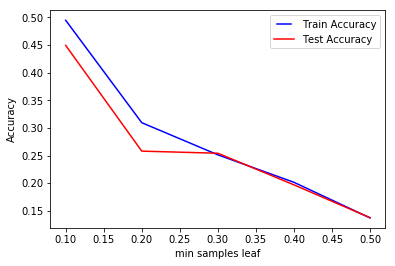

In [93]:
# Configurando análise
min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)

train_results = []
test_results = []

for n in min_samples_leaf:
    
    tree_clf = DecisionTreeClassifier(min_samples_leaf=n)
    tree_clf.fit(X_train, y_train)
    
    # Análise nos dados de treino
    tree_train_scores = cross_val_score(tree_clf, X_train, y_train, 
                                 cv=3, scoring='accuracy')
    train_results.append(tree_train_scores.mean())
    
    # Análise nos dados de teste
    tree_test_scores = cross_val_score(tree_clf, X_test, y_test,
                                      cv=3, scoring='accuracy')
    test_results.append(tree_test_scores.mean())

# Plotando gráfico
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leaf, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leaf, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('min samples leaf')
plt.show()

Assim como a plotagem referente ao hiperparâmetro ```min_samples_split```, neste caso, temos indícios de underfitting, uma vez que a acurácia do modelo cai de acordo com o aumento de ```min_samples_leaf```.

#### max_features

Este hiperparâmetro representa o número de features a serem consideradas durante a procura da melhor configuração.

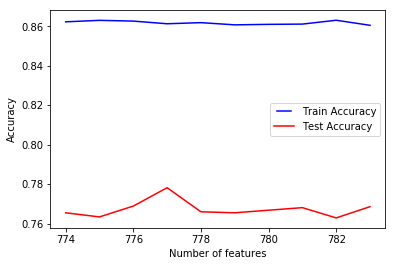

In [97]:
# Configurando análise
max_features = list(range(X_train.shape[1]-10, X_train.shape[1]))

train_results = []
test_results = []

for n_features in max_features:
    
    tree_clf = DecisionTreeClassifier(max_features=n_features)
    tree_clf.fit(X_train, y_train)
    
    # Análise nos dados de treino
    tree_train_scores = cross_val_score(tree_clf, X_train, y_train, 
                                 cv=3, scoring='accuracy')
    train_results.append(tree_train_scores.mean())
    
    # Análise nos dados de teste
    tree_test_scores = cross_val_score(tree_clf, X_test, y_test,
                                      cv=3, scoring='accuracy')
    test_results.append(tree_test_scores.mean())

# Plotando gráfico
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(max_features, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.show()

A análise que se faz, para este hiperparâmetro, dentro deste conceito é que, como temos um problema de classificação de imagens, temos uma grande número de features (784, para sermos exatos). Dado este fato, não há muita lógica em utilizar uma quantidade menor de features para análise.

Para fins didáticos, a avaliação do gráfico acima indica, novamente, um overfitting nos dados.

#### criterion

Este hiperparâmetro define a função responsável por medir a qualidade do split. Há duas opções: *"gini"* para definir a Impureza Gini e *"entropy"* para definir o ganho de informação.

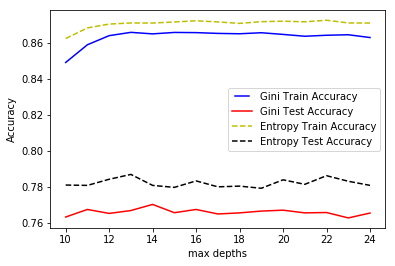

In [136]:
# Avaliando os diferentes critérios de acordo com a máxima profundidade
max_depths = list(range(10, 25))

gini_train_results = []
gini_test_results = []
entropy_train_results = []
entropy_test_results = []

for max_depth in max_depths:
    
    # Criando classificador com critério 'gini'
    tree_gini = DecisionTreeClassifier(max_depth=max_depth, criterion='gini')
    
    # Avaliando nos dados de treino
    gini_train_scores = cross_val_score(tree_gini, X_train, y_train,
                                       cv=3, scoring='accuracy')
    gini_train_results.append(gini_train_scores.mean())
    
    # Avaliando nos dados de teste
    gini_test_scores = cross_val_score(tree_gini, X_test, y_test,
                                      cv=3, scoring='accuracy')
    gini_test_results.append(gini_test_scores.mean())
    
    # Criando classificador com critério 'entropy'
    tree_entropy = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy')
    
    # Avaliando nos dados de treino
    entropy_train_scores = cross_val_score(tree_entropy, X_train, y_train,
                                           cv=3, scoring='accuracy')
    entropy_train_results.append(entropy_train_scores.mean())
    
    # Avaliando nos dados de teste
    entropy_test_scores = cross_val_score(tree_entropy, X_test, y_test,
                                          cv=3, scoring='accuracy')
    entropy_test_results.append(entropy_test_scores.mean())

# Plotando gráfico 
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, gini_train_results, 'b', label='Gini Train Accuracy')
line2, = plt.plot(max_depths, gini_test_results, 'r', label='Gini Test Accuracy')
line3, = plt.plot(max_depths, entropy_train_results, 'y--', label='Entropy Train Accuracy')
line4, = plt.plot(max_depths, entropy_test_results, 'k--', label='Entropy Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('max depths')
plt.show()

A análise do gráfico acima indica que, entre os critérios ```"gini"``` e ```"entropy"```, é preferível utilizar o critério ```"entropy"```, uma vez que as acurácias, tanto para treino, quanto para teste, apresentaram valores maiores.

Adicionalmente, um ```max_depth``` de 13 foi o melhor índice para os dados de teste.

#### GridSearchCV

Após avaliar os efeitos de diferentes hiperparâmetros, a ideia agora é realizar uma busca da melhor combinação de hiperparâmetros utilizando o ```GridSearchCV```.

In [159]:
np.linspace(.1, .5, 5)

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [170]:
# Aplicando GridSearchCV
from sklearn.model_selection import GridSearchCV

# Definindo parâmetros para Decision Trees
param_grid_tree = [
    {
     'criterion': ['gini', 'entropy'],
     'min_samples_split': [2, 10, 20],
     'max_depth': [None, 5, 10, 15],
     'min_samples_leaf': [1, 5, 10]
     #'max_leaf_nodes': [None, 5, 10, 20]
    }
]

# Criando classificador
tree_clf = DecisionTreeClassifier()

# Treinando e procurando a melhor combinação
grid_search_2 = GridSearchCV(tree_clf, param_grid_tree, cv=3, 
                           scoring='accuracy', verbose=3)

grid_search_2.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, score=0.8637772445510897, total=  11.3s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, score=0.8572928646432322, total=  11.6s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, score=0.8646296944541682, total=  11.3s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, score=0.860627874425115, total=  11.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, score=0.8584929246462323, total=  11.4s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, score=0.8621793268990349, total=  11.2s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=20, score=0.8582783443311338, total=  11.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=20 
[CV]  c

[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=20, score=0.6698004700705106, total=   3.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=2, score=0.6504199160167966, total=   9.7s
[CV] criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=2, score=0.6779338966948347, total=  10.8s
[CV] criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=2, score=0.6698004700705106, total=   8.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=10, score=0.6504199160167966, total=   8.3s
[CV] criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=20, score=0.8594281143771246, total=  17.4s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=20, score=0.8590429521476074, total=  17.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=20, score=0.8606290943641546, total=  17.3s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, score=0.8625774845030993, total=  17.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, score=0.8652932646632332, total=  16.6s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_dept

[CV]  criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=10, score=0.8708258348330334, total=  17.3s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=10, score=0.8646932346617331, total=  18.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=10, score=0.862529379406911, total=  18.4s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=20, score=0.8714257148570286, total=  18.4s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=20, score=0.8653432671633582, total=  18.4s
[CV] criterion=entropy, max_depth=None, min_sampl

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=20, score=0.8544281642246337, total=  16.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2, score=0.8686762647470506, total=  15.6s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2, score=0.8621931096554828, total=  16.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2, score=0.8567285092763914, total=  16.8s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, score=0.8674765046990602, total=  16.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10 
[

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=10, score=0.8657432871643582, total=  18.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=10, score=0.8633294994249138, total=  18.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=20, score=0.8710257948410318, total=  21.3s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=20, score=0.8650932546627331, total=  19.9s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=10, min_samples_split=20, score=0.8635295294294144, total=  23.4s


[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed: 50.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 10, 20], 'max_depth': [None, 5, 10, 15], 'min_samples_leaf': [1, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

A procura pelos melhores parâmetros através do ```GridSearchCV``` demorou aproximadamente 50 minutos (216 fits), o que torna este procedimento extremamente custoso com o processamento disponível. Para os demais algoritmos, será discutido se este procedimento será mantido.

### Avaliando Resultados

In [172]:
# Analisando melhor modelo
grid_search_2.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [175]:
# Analisando acurácia obtida com os dados de treino
final_model = grid_search_2.best_estimator_

final_train_pred = final_model.predict(X_train)
final_acc_train = accuracy_score(y_train, final_train_pred)
print(f'Acurácia final nos dados de treino: {final_acc_train*100:.4f}%')

Acurácia final nos dados de treino: 99.5300%


In [176]:
# Analisando acurácia obtida com os dados de teste
final_test_pred = final_model.predict(X_test)
final_acc_test = accuracy_score(y_test, final_test_pred)
print(f'Acurácia obtida nos dados de teste: {final_acc_test*100:.4f}%')

Acurácia obtida nos dados de teste: 88.6600%


In [179]:
# Comunicando melhora
print(f'Acurácia inicial: {tree_scores.mean()*100:.4f}%')
print(f'Acurácia com padronização: {tree_scores_scaled.mean()*100:.4f}%')
print(f'Acurácia com Grid Search CV(1): {grid_search.best_score_*100:.4f}%')
print(f'Acurácia com Grid Search CV(2): {grid_search_2.best_score_*100:.4f}%')

print(f'\nGanho total até o momento: {(grid_search_2.best_score_ - tree_scores.mean())*100:.4f}%')

Acurácia inicial: 86.1300%
Acurácia com padronização: 86.2717%
Acurácia com Grid Search CV(1): 87.3100%
Acurácia com Grid Search CV(2): 87.2133%

Ganho total até o momento: 1.0834%


Tanto o primeiro, quanto o segundo grid_search aplicados apresentaram taxas extremamente próximas

In [182]:
# Primeiro grid_search
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 15}

In [183]:
# Segundo grid_search
grid_search_2.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Vamos comparar a capacidade de generalização de cada um deles.

In [188]:
# Primeiro modelo
first_grid = grid_search.best_estimator_
scaler = StandardScaler()

X_test_scaled = scaler.fit_transform(X_test)
first_pred = first_grid.predict(X_test_scaled)
first_acc = accuracy_score(y_test, first_pred)
print(f'Acurácia nos dados de teste (grid search 1): {first_acc*100:.4f}%')

# Segundo modelo
print(f'Acurácia nos dados de teste (grid search 2): {final_acc_test*100:.4f}%')

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Acurácia nos dados de teste (grid search 1): 83.6000%
Acurácia nos dados de teste (grid search 2): 88.6600%


Conclusões:
    - A padronização nos dados influenciou na performance do modelo nos dados de TREINO
    - Com relação aos dados de TESTE, o primeiro grid_search treinado apresentou OVERFITTING
    - A vantagem do segundo grid_search se deu na melhor acurácia obtida com os dados de TESTE

In [189]:
# Overview final - Treinando classificador sem configuração alguma
tree_final = DecisionTreeClassifier()
tree_final.fit(X_train, y_train)

final_pred_normal = tree_final.predict(X_test)
final_acc_normal = accuracy_score(y_test, final_pred_normal)
print(f'Acurácia nos dados de teste (treino padrão): {final_acc_normal*100:.4f}%')
print(f'Acurácia nos dados de teste (grid search 1): {first_acc*100:.4f}%')
print(f'Acurácia nos dados de teste (grid search 2): {final_acc_test*100:.4f}%')

Acurácia nos dados de teste (treino padrão): 87.6900%
Acurácia nos dados de teste (grid search 1): 83.6000%
Acurácia nos dados de teste (grid search 2): 88.6600%


Aplicando o ```GridSearchCV``` adequadamente, é possível obter um ganho de aproximadamente 1% de acurácia com os dados de teste.

Fontes:

https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3

http://chrisstrelioff.ws/sandbox/2015/06/25/decision_trees_in_python_again_cross_validation.html

https://www.jeremyjordan.me/hyperparameter-tuning/

## SGD Classifier

In [190]:
# Realizando procedimento para leitura dos dados
X_train, y_train, X_test, y_test = prepare_mnist()

In [33]:
# Importando classificador
from sklearn.linear_model import SGDClassifier

# Criando classificador e treinando modelo
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

# Realizando predições
sgd_pred = sgd_clf.predict(X_train)

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


## Avaliando Performance

In [35]:
# Testando Acurácia nos dados de treino
accuracy_score(sgd_pred, y_train) * 100

88.02

Para ter certeza de que não se trata de um Overfitting, vamos aplicar validação cruzada com os dados de treino.

In [37]:
# Aplicando cross validation
sgd_scores_train = cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring='accuracy')

# Comunicando resultados
display_scores(sgd_scores_train)

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\thiagoPan

Scores: [0.8790504  0.85985669 0.86966667 0.8790531  0.87154051]
Média: 0.8718
Desvio Padrão: 0.0071


Muito próximo do modelo ```DecisionTrees```. Talvez aplicando alguma melhoria nos dados de treino, este índice possa melhorar.

    - Voltar no Decision Trees e aplicar todas as métricas de Acurácia, Matriz de Confusão, Precision, Recall, F1, etc...